In [12]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from google.colab import files
%matplotlib inline
sns.set(style="whitegrid")

In [13]:
# Step 2: Upload CSV File
uploaded = files.upload()  # Click "Choose Files" and select your CSV
file_name = list(uploaded.keys())[0]
print("Uploaded file:", file_name)

Saving 1730285881-Airbnb_Open_Data.csv to 1730285881-Airbnb_Open_Data (2).csv
Uploaded file: 1730285881-Airbnb_Open_Data (2).csv


In [14]:
# Step 3: Load Dataset
df = pd.read_csv(file_name, low_memory=False)  # Avoid dtype warnings
print("Original Dataset Shape:", df.shape)

Original Dataset Shape: (102599, 26)


In [15]:
# Step 4: Clean Column Names
# Remove spaces, convert to lowercase, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Cleaned Column Names:", df.columns.tolist())

Cleaned Column Names: ['id', 'name', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country', 'country_code', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'house_rules', 'license']


In [18]:
# Step 5: Data Cleaning & Preprocessing
# ---------------------
# Handle missing values

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['review_rate_number'] = df['review_rate_number'].fillna(df['review_rate_number'].median())


In [19]:
# Convert date columns
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [20]:
# Remove outliers in price
df = df[df['price'] <= 10000]

In [21]:
# Feature Engineering
current_year = 2025
df['property_age'] = current_year - df['construction_year']
df['last_review_month'] = df['last_review'].dt.month
df['last_review_year'] = df['last_review'].dt.year

print("Cleaned Dataset Shape:", df.shape)

Cleaned Dataset Shape: (102352, 29)


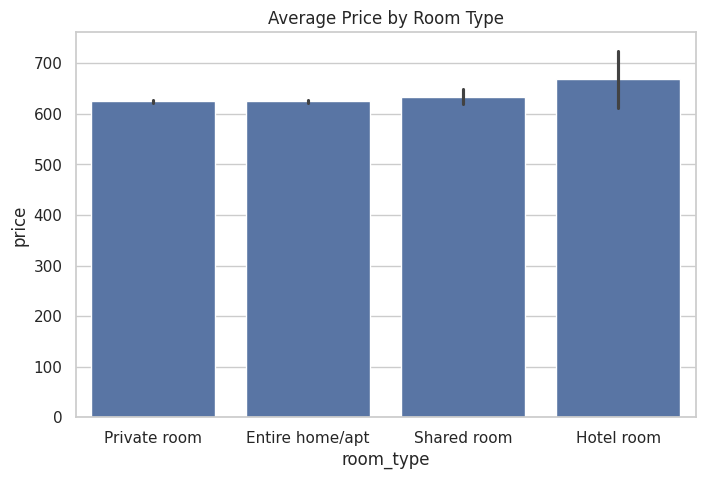

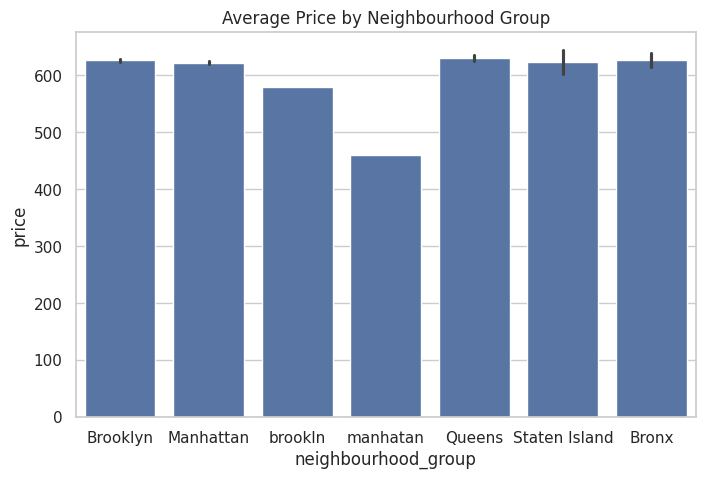

In [22]:
# Step 6: Exploratory Data Analysis (EDA)
# ---------------------------------------

# 6.1 Price Analysis
plt.figure(figsize=(8,5))
sns.barplot(x='room_type', y='price', data=df)
plt.title('Average Price by Room Type')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='neighbourhood_group', y='price', data=df)
plt.title('Average Price by Neighbourhood Group')
plt.show()

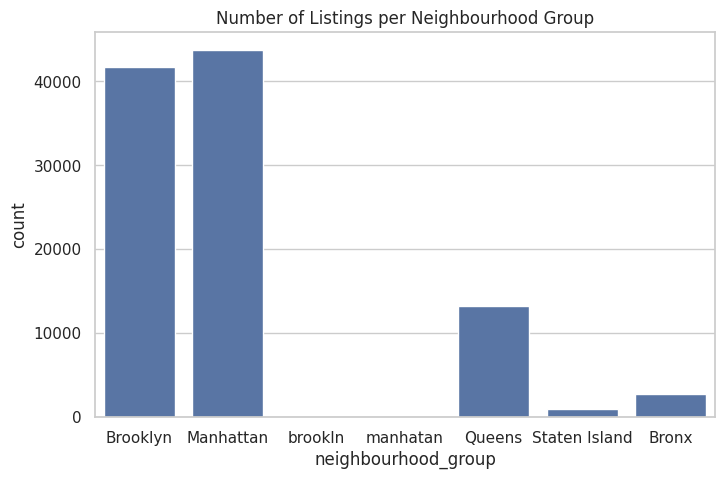

In [23]:
# 6.2 Booking Trends
plt.figure(figsize=(8,5))
sns.countplot(x='neighbourhood_group', data=df)
plt.title('Number of Listings per Neighbourhood Group')
plt.show()

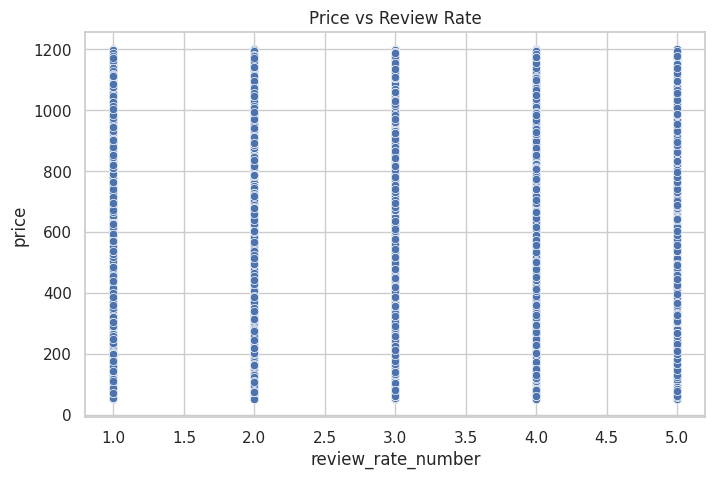

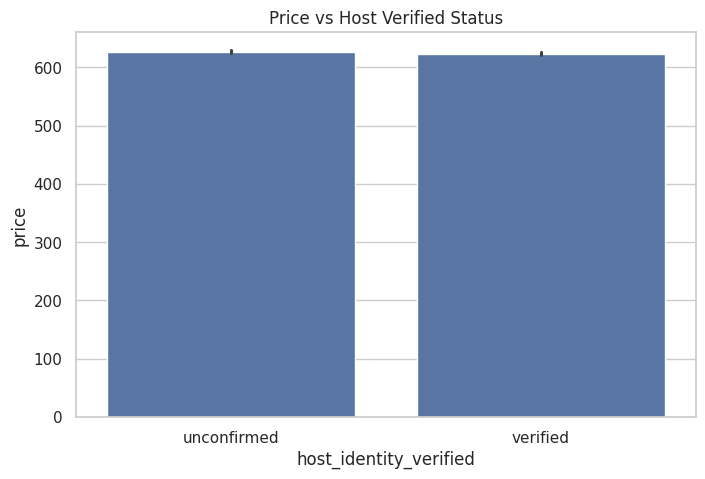

In [24]:
# 6.3 Review Analysis
plt.figure(figsize=(8,5))
sns.scatterplot(x='review_rate_number', y='price', data=df)
plt.title('Price vs Review Rate')
plt.show()

# 6.4 Host Analysis
plt.figure(figsize=(8,5))
sns.barplot(x='host_identity_verified', y='price', data=df)
plt.title('Price vs Host Verified Status')
plt.show()

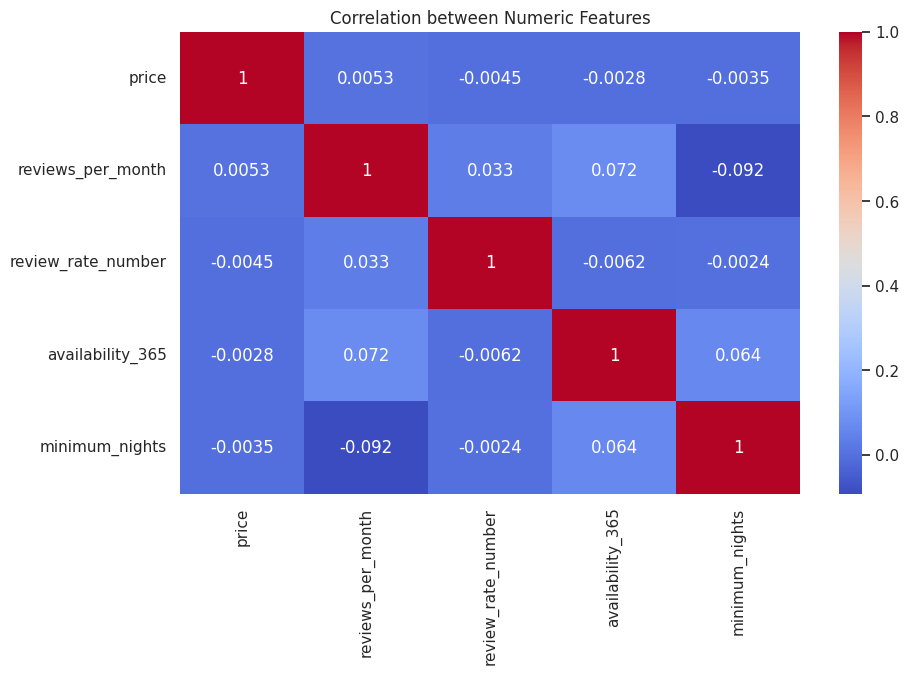

In [25]:
# 6.5 Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[['price','reviews_per_month','review_rate_number','availability_365','minimum_nights']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numeric Features')
plt.show()

In [27]:
# Step 7: Save Cleaned Data
cleaned_file_name = 'airbnb_cleaned.csv'
df.to_csv(cleaned_file_name, index=False)
files.download(cleaned_file_name)
print(f"Cleaned dataset saved and ready to download as '{cleaned_file_name}'")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cleaned dataset saved and ready to download as 'airbnb_cleaned.csv'
